# Read Sensor data and save into a file

In [68]:
import socket
import traceback
import csv
import pandas as pd
import time
import os

activity = 1
waitTime = 5

host = ''
port = 5555
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
s.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)
s.bind((host, port))
data = []




def createTrainLog(activity):
    f = open('0'+ str(activity) + '_trainLog.csv', 'w')
    f.write('time,sensor,x,y,z,sensor,x,y,z,sensor,x,y,z,activity\n')
    return f

def receiveData(activity, f):
        try:
            message, address = s.recvfrom(8192)
            print "Receiving Data"        
            f.write(message + ', ' + str(activity) +' \n ')
        except (KeyboardInterrupt, SystemExit):
            print data
            f.close()
            raise
        except:
                traceback.print_exc()





# Activities: Stand = 1, Sit = 2, Bend = 3, Crouch = 4, Walk = 5



def beep(a,b,c = "sine"):
    # a = Duration
    # b = Frequency
    # c = Waveform
    os.system('play --no-show-progress --null --channels 1 synth %s %s %f' % ( a,c, b))


def countdown(seconds):
    
    while seconds > 0:
        print seconds
        beep(0.5,440)
        seconds -=1
        time.sleep(1)
        
        
def activityTimer(activity, timeLimit = 10):
    
    print "Prepare to execute Activty " + str(activity) + " in..."
    countdown(waitTime)
    print "Execute Activity "+ str(activity)
    beep(1,660)
    now = time.time()
    secs = timeLimit
    f = createTrainLog(activity)
    
    while (time.time()-now) <= timeLimit:
        
        receiveData(activity, f)
        if((time.time()-now)==math.floor(time.time()-now)):
            print "Stop in " + str(secs)
            secs -= 1 
            
    beep(1,100,"saw")
    print "Stop"
    time.sleep(waitTime)
    
    
for i in range(1,6):
    activityTimer(activity)
    activity += 1




    
   

Prepare to execute Activty 1 in...
5
4
3
2
1
Execute Activity 1
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Stop
Prepare to execute Activty 2 in...
5
4
3
2
1
Execute Activity 2
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Data
Receiving Da

KeyboardInterrupt: 

In [64]:
import time
import os


activity = 1
waitTime = 5

def beep(a,b,c = "sine"):
    # a = Duration
    # b = Frequency
    # c = Waveform
    os.system('play --no-show-progress --null --channels 1 synth %s %s %f' % ( a,c, b))


def countdown(seconds):
    
    while seconds > 0:
        print seconds
        beep(0.5,440)
        seconds -=1
        time.sleep(1)
        
        
def activityTimer(activity, timeLimit = 10):
    
    print "Prepare to execute Activty " + str(activity) + " in..."
    countdown(waitTime)
    print "Execute Activity "+ str(activity)
    beep(1,660)
    now = time.time()
    secs = timeLimit
    while (time.time()-now) <= timeLimit:
        if((time.time()-now)==math.floor(time.time()-now)):
            print "Stop in " + str(secs)
            secs -= 1        
    beep(1,100,"saw")
    print "Stop"
    time.sleep(waitTime)
    
    
for i in range(1,6):
    activityTimer(activity)
    activity += 1
        
    


Prepare to execute Activty 1 in...
5
4
3
2
1
Execute Activity 1
Stop in 10
Stop in 9
Stop in 8
Stop in 7
Stop in 6
Stop in 5
Stop in 4
Stop in 3
Stop in 2
Stop in 1
Stop
Prepare to execute Activty 2 in...
5
4
3
2
1
Execute Activity 2
Stop in 10
Stop in 9
Stop in 8
Stop in 7
Stop in 6
Stop in 5
Stop in 4
Stop in 3
Stop in 2
Stop in 1
Stop
Prepare to execute Activty 3 in...
5
4
3
2
1
Execute Activity 3
Stop in 10
Stop in 9
Stop in 8
Stop in 7
Stop in 6
Stop in 5
Stop in 4
Stop in 3
Stop in 2
Stop in 1
Stop
Prepare to execute Activty 4 in...
5
4
3
2
1
Execute Activity 4
Stop in 10
Stop in 9
Stop in 8
Stop in 7
Stop in 6
Stop in 5
Stop in 4
Stop in 3
Stop in 2
Stop in 1
Stop
Prepare to execute Activty 5 in...
5
4
3
2
1
Execute Activity 5
Stop in 10
Stop in 9
Stop in 8
Stop in 7
Stop in 6
Stop in 5
Stop in 4
Stop in 3
Stop in 2
Stop in 1
Stop


In [63]:
import os
def beep(a,b,c = "sine"):
    # a = Duration
    # b = Frequency
    # c = Waveform
    os.system('play --no-show-progress --null --channels 1 synth %s %s %f' % ( a,c, b))
beep(1,100,"saw")


# Plot Data

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


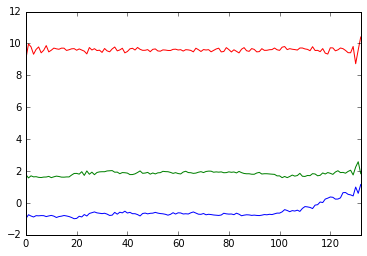

In [7]:
%pylab inline
import pandas as pd
import pylab
import numpy as np
data = pd.read_csv('data.csv')
data['x']
x = data['x']
y = data['y']
z = data['z']
x.plot()
y.plot()
z.plot()

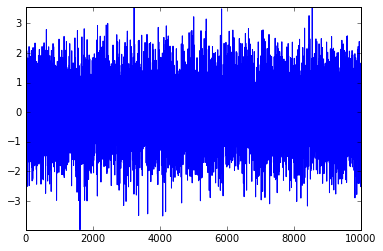

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

fig = plt.figure()
ax = fig.add_subplot(111)

# some X and Y data
x = np.arange(10000)
y = np.random.randn(10000)

li, = ax.plot(x, y)

# draw and show it
ax.relim() 
ax.autoscale_view(True,True,True)
fig.canvas.draw()
plt.show(block=False)

# loop to update the data
while True:
    try:
        y[:-10] = y[10:]
        y[-10:] = np.random.randn(10)

        # set the new data
        li.set_ydata(y)

        fig.canvas.draw()

        time.sleep(0.01)
    except KeyboardInterrupt:
        break

# Data Manipulation Tests

In [9]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,time,sensor,x,y,z,sensor.1,x.1,y.1,z.1,sensor.2,x.2,y.2,z.2
0,294169.96504,3,-0.978,1.769,9.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,294170.02471,3,-0.742,1.568,9.971,4.0,-0.007,-0.069,0.040,NaN,NaN,NaN,NaN
2,294170.08465,3,-0.822,1.699,9.790,4.0,-0.006,0.044,-0.038,NaN,NaN,NaN,NaN
3,294170.14460,3,-0.882,1.633,9.326,4.0,-0.010,-0.040,-0.014,NaN,NaN,NaN,NaN
4,294170.20429,3,-0.800,1.645,9.627,4.0,0.009,-0.009,-0.023,5.0,-57.24,15.84,-50.22


In [35]:
#remove columns identifying the sensors
data[data.columns.difference([1,5,9])]

,0,2,3,4,6,7,8,10,11,12
0,249918.86226,-0.153,0.367,9.791,-0.011,-0.001,-0.025,12.00,-5.16,13.14
1,249918.88221,-0.170,0.353,9.770,-0.009,-0.005,-0.025,12.00,-5.16,13.14
2,249918.90216,-0.152,0.388,9.822,-0.011,-0.009,-0.025,12.00,-5.16,13.14
3,249918.92211,-0.114,0.379,9.786,-0.011,-0.003,-0.025,12.00,-5.22,13.14
4,249918.94211,-0.141,0.355,9.796,-0.012,-0.005,-0.026,11.94,-5.28,13.08
5,249918.96204,-0.174,0.376,9.808,-0.010,-0.009,-0.024,11.94,-5.40,13.08
6,249918.98197,-0.154,0.379,9.761,-0.011,-0.002,-0.026,11.94,-5.46,13.08
7,249919.00193,-0.143,0.366,9.825,-0.011,-0.007,-0.026,11.94,-5.52,13.08
8,249919.02188,-0.153,0.355,9.820,-0.010,-0.011,-0.025,11.94,-5.58,13.08
9,249919.04184,-0.129,0.357,9.797,-0.013,-0.002,-0.026,11.94,-5.64,13.08


In [37]:
df = data
df.mean()

0     249924.069939
1          3.000000
2          0.486076
3          0.223608
4          9.774055
5          4.000000
6          0.017898
7         -0.029594
8          0.034407
9          5.000000
10         9.280473
11        -6.634201
12        13.513609
dtype: float64